<a href="https://colab.research.google.com/github/5KAZALI/ASP.NETCore/blob/master/Copy_of_SP_Prec_VBIV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Desctription: Predicting Closing Stock Price using artifical neural network(LSTM) :VBIV and  passed 1 year of closing stock price

In [ ]:
#Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


hello


In [ ]:
#Stock Quote
df = web.DataReader('VBIV', data_source='yahoo', start='2019-8-11', end='2020-8-11')
df

In [ ]:
df.shape

(253, 6)

In [ ]:
#visualize closing price based on historical data
plt.figure(figsize=(16,8))
plt.title('Ticker:VBIV-1Year Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.show()

In [ ]:
#New DataFrame contains only close column 
data = df.filter(['Close']) 
#Convert closing price to numpy array
dataset = data.values
#Training 80% of dataset_closing
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

203

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

In [ ]:
#Crate the raining data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []  #independent variables
y_train = []  #dependent variables 

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #contains 60 values
  y_train.append(train_data[i, 0])      #60. value
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

In [ ]:
 x_train, y_train = np.array(x_train) , np.array(y_train)
 print('success')

In [ ]:
#Reshape the Data LSDM MODEL EXPECTS 3DIMENTIONAL DATA
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(143, 60, 1)

In [ ]:
#building the LSDM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#cOMILING THE MODEL
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

143/143 [==============================] - 3s 22ms/step - loss: 0.0036


In [ ]:
#Creating the testing data set
#create new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets _x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
print('success') 

success


In [ ]:
#Convert the data to numpy array
x_test = np.array(x_test)
print('success')

success


In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print('success')


success


In [ ]:
#Get Predictied Price Values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print('success')

success


In [ ]:
#Evaluate Model by Getting mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

0.4175532698631287

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


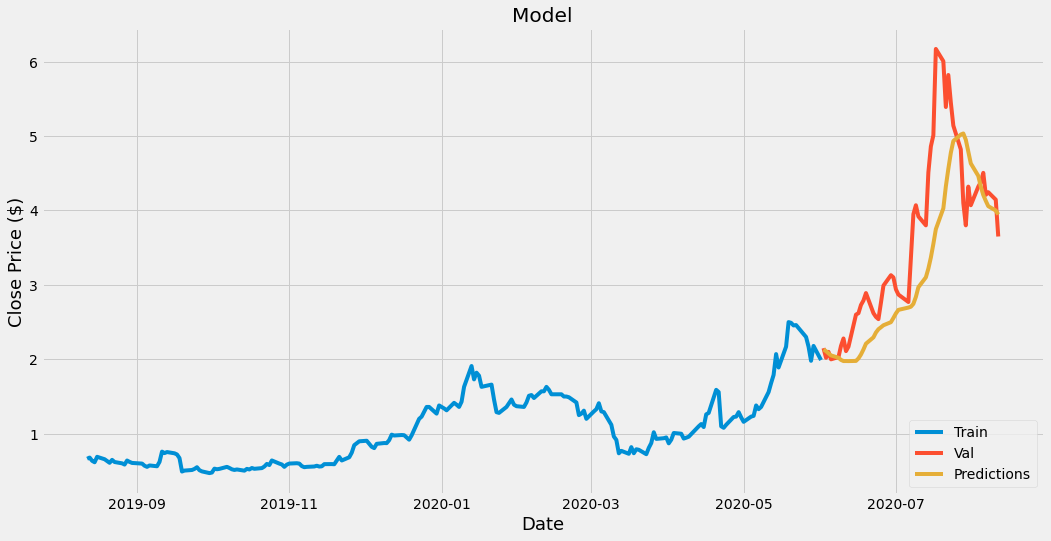

success


In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
print('success')

In [ ]:
#Show the valid and predicted prices
valid


In [ ]:
vbiv_quote = web.DataReader('VBIV', data_source='yahoo', start='2019-8-11', end='2020-8-11')
#create new data frame
new_df = vbiv_quote.filter(['Close'])
#last 60 days closing price
last_60_days = new_df[-60:].values 
#scale the date 
last_60_days_scaled = scaler.transform(last_60_days)
#Empty List
X_TEST = []
#APPEND
X_TEST.append(last_60_days_scaled)
#Convert X_TEST to numpy array
X_TEST = np.array(X_TEST)
X_TEST = np.reshape(X_TEST, (X_TEST.shape[0], X_TEST.shape[1], 1))
#predicted scaled price
pred_price = model.predict(X_TEST)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[3.8652327]]


In [ ]:
vbiv_quote2 = web.DataReader('VBIV', data_source='yahoo', start='2020-8-11', end='2020-8-11')
print(vbiv_quote2['Close'])

Date
2020-08-11    3.65
2020-08-11    3.65
Name: Close, dtype: float64
